In [1]:
import os.path
from scipy import *
import numpy as np
from numpy import *
from numpy import linalg as LA
from scipy import linalg as LA2
import sympy as sympy
import sys as sys
import time
import matplotlib.pyplot as plt
import itertools as it
from IPython.core.display import HTML
import BasicTools as BT
import WaveTools as WT
import PlotTools as PT
import FFTTools as FFTT
import OperatorTools as OT
import GridTransferTools as GTT

display(HTML("<style>pre { white-space: pre !important; }</style>"))
np.set_printoptions( linewidth = 1000)

In [2]:
def ForwardEuler(omega, u0, nt, const, CFL = 1., periodic = False):
    degFreed = omega.degFreed[::-1][0]
    x = omega.xCell
    dx = omega.dx
    dx_0 = 1 - x[::-1][0] + x[0]
    dt = CFL * dx / const
    dt_0 = CFL * dx_0 / const
    t = nt * dt[0]
#     print(shape(dx))
    """
    Solves the 1D linear convection equation
    with constant speed c in the domain [0, L]
    and plots the solution (along with the initial conditions).

    Parameters
    ----------
    nx : integer
        Number of grid points to discretize the domain.
    L : float, optional
        Length of the domain; default: 2.0.
    c : float, optional
        Convection speed; default: 1.0.
    dt : float, optional
        Time-step size; default: 0.025.
    nt : integer, optional
        Number of time steps to compute; default: 20.
    """
    u = u0.copy()
    for n in range(nt - 1):
        u_f = u[::-1][0]
        u[1:] = u[1:] - (const * (dt / dx) * (u[1:] - u[:-1]))
        if (periodic == True):
            u[0] = u[0] - (const * (dt_0 / dx_0) * (u[0] - u_f))
    return u, t

In [3]:
def Gauss(x, sigma, mu):
    gauss = (1. / (sigma * np.sqrt(2. * np.pi))) * np.exp(-((x - mu)**2) / (2. * (sigma**2)))
    return gauss

In [4]:
omega = BT.Grid(64)
waves = WT.MakeWaves(omega)
wavesNode = WT.MakeNodeWaves(omega)

In [5]:
nt = 20
c = 1.
x = omega.xCell
xNode = omega.xNode
newWave, t = ForwardEuler(omega, waves[:, 1], nt, c, CFL = 1, periodic = True)
otherWave = (1.0 / (2.0 * np.pi)) * (cos((2 * np.pi * xNode[:-1])  - (c * t)) - cos((2 * np.pi * xNode[1:]) - (c * t)))
h = omega.h
n = len(h)
hs = np.zeros((n, n), float)
np.fill_diagonal(hs, h)
hMat = LA.inv(hs)
otherWave = hMat @ otherWave
print(shape(hMat))
print(shape(otherWave))

(64, 64)
(64,)


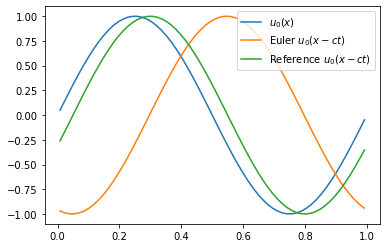

0.9983943930356196 0.9983943930356196


In [6]:
xCell = omega.xCell
xNode = omega.xNode
if (nt % 2 == 0):
    x_1 = xCell
else:
    x_1 = xNode[:-1]
fig = plt.figure()
plt.plot(x, waves[:, 1], label = r'$u_{0} (x)$')
plt.plot(x_1, newWave, label = r'Euler $u_{0} (x - c t)$')
plt.plot(x, otherWave, label = r'Reference $u_{0} (x - c t)$')
plt.legend()
plt.show()
print(np.max(waves[:, 1]), np.max(newWave))
fig.savefig('/Users/sashacurcic/SashasDirectory/ANAG/FV_MG/Figures/SingleModePropPer' + '.png', bbox_inches = 'tight', dpi = 600, transparent = True)

(64,)


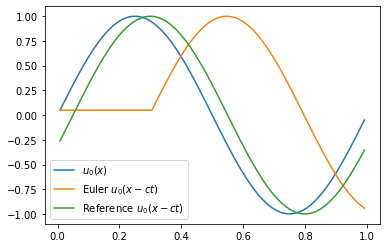

In [7]:
nt = 20
newWave, t = ForwardEuler(omega, waves[:, 1], nt, c, CFL = 1)
print(shape(newWave))
xCell = omega.xCell
xNode = omega.xNode
if (nt % 2 == 0):
    x_1 = xCell
else:
    x_1 = xNode[:-1]
fig = plt.figure()
plt.plot(x, waves[:, 1], label = r'$u_{0} (x)$')
plt.plot(x_1, newWave, label = r'Euler $u_{0} (x - c t)$')
plt.plot(x, otherWave, label = r'Reference $u_{0} (x - c t)$')
plt.legend()
plt.show()
fig.savefig('/Users/sashacurcic/SashasDirectory/ANAG/FV_MG/Figures/SingleModeProp' + '.png', bbox_inches = 'tight', dpi = 600, transparent = True)

In [8]:
sigma = 0.1
mu = 0.5
gauss = Gauss(x, sigma, mu) # (1. / (sigma * np.sqrt(2. * np.pi))) * np.exp(-((x - mu)**2) / (2. * (sigma**2)))
mu = mu + (c * t)
otherGauss = Gauss(x, sigma, mu)
newGauss, t = ForwardEuler(omega, gauss, nt, c)

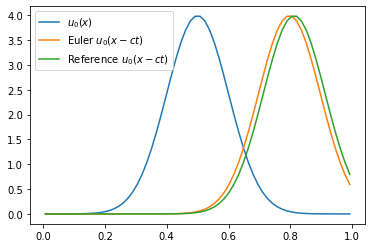

3.9772666101191025 3.9772666101191025


In [9]:
xCell = omega.xCell
xNode = omega.xNode
if (nt % 2 == 0):
    x_1 = xCell
else:
    x_1 = xNode[:-1]
fig = plt.figure()
plt.plot(x, gauss, label = r'$u_{0} (x)$')
plt.plot(x_1, newGauss, label = r'Euler $u_{0} (x - c t)$')
plt.plot(x, otherGauss, label = r'Reference $u_{0} (x - c t)$')
plt.legend()
plt.show()
print(np.max(gauss), np.max(newGauss))
fig.savefig('/Users/sashacurcic/SashasDirectory/ANAG/FV_MG/Figures/GaussProp' + '.png', bbox_inches = 'tight', dpi = 600, transparent = True)